
***Description***

**Background:** 

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

**Objective:**

Statistical analysis of business data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

You are expected to perform the statistical analysis to answer the following questions:

Explore the dataset and extract insights using Exploratory Data Analysis.
Do the users spend more time on the new landing page than the old landing page?
Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
Is the mean time spent on the new page same for the different language users?
*Consider a significance level of 0.05 for all tests.


**Data Dictionary:**

user_id - This represents the user ID of the person visiting the website.

group - This represents whether the user belongs to the first group (control) or the second group (treatment).

landing_page - This represents whether the landing page is new or old.

time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.

converted - This represents whether the user gets converted to a subscriber of the news portal or not.

language_preferred - This represents the language chosen by the user to view the landing page.


In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import statistical package
import scipy.stats as stats

%matplotlib inline

In [2]:
#Read the data
df = pd.read_csv('abtest.csv')
df

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
...,...,...,...,...,...,...
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish


The DataFrams has 100 rows and 6 columns. The columns are group, the landing_page(old or new), time_spent_on_the_page (in minutes), converted (yes/no), and language preferred 

In [3]:
df.info()  # Returns concise summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


**Observation**
The columns - group, landing_page, converted and language are all object types. time_spent_on_the_page is a float type

In [4]:
df.isnull().sum() # Returns the total no of missing rows or column

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

No missing rows or column.

In [5]:
df.describe()  #returns data statistic

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


**time_spent_on_the_page** is the only numberical column and has the following statistic: The mean and the standard deviation are  is 5.38 minutes 
2.38 minutes respectively. The range is from 0.19 minute to 10.71 minute.

In [6]:
df.groupby("landing_page")['time_spent_on_the_page']

In [23]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [24]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

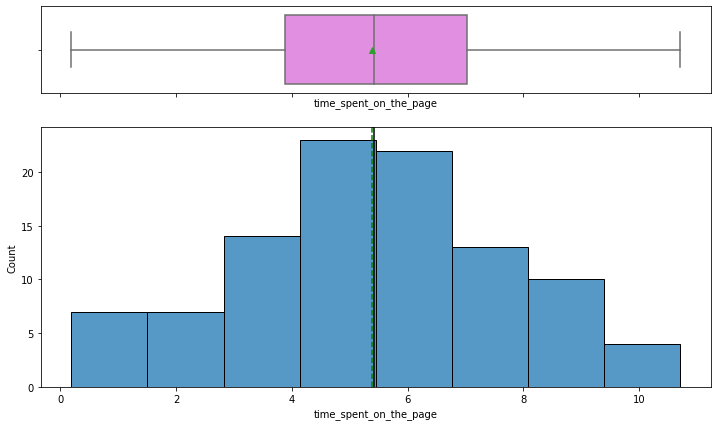

mean: 5.38 and median: 5.42


In [25]:
histogram_boxplot(df, "time_spent_on_the_page")
plt.show()
mean = round(df["time_spent_on_the_page"].mean(), 2)
median = round(df["time_spent_on_the_page"].median(), 2)
print('mean:',mean, 'and median:',  median)

The time spent on the page is normally distributed; the mean and the median are about the same, 5,40 and 5,42 minutes respctively,  and there are no outliers.
    

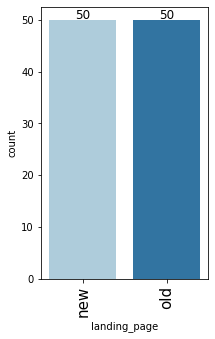

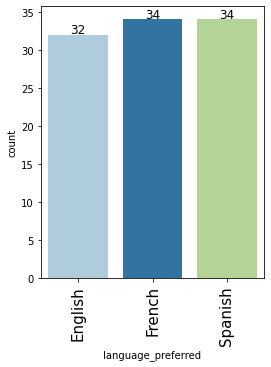

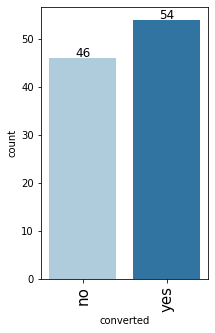

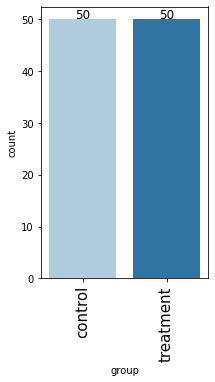

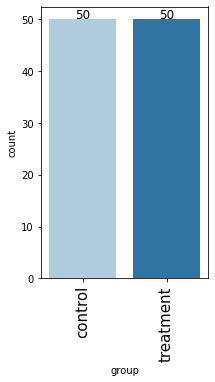

In [26]:
# Plots of different graphs 
ax1 = labeled_barplot(
    df, "landing_page"
)  
plt.show()
ax2 = labeled_barplot(df, "language_preferred")
plt.show()
ax3 = labeled_barplot(df, "converted")
plt.show()
ax4 = labeled_barplot(df, "group")
plt.show()
ax3 = labeled_barplot(df, 'group')

**Observation**

Of the 100 Customers surveyed:

50 Customers, also referred to as the control group were served to the old lading_page.

50 Customers, also referred to as the treatment group were served to the new landing_page.


32 customers chose to view the landing page in spanish

32 customers chose to view the landing page in English

34 customers chose to view the landing page in spanish

In all 54 users got converted to a subscriber of the news portal.



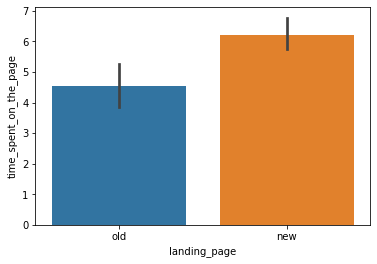

landing_page
new    6.22
old    4.53
Name: time_spent_on_the_page, dtype: float64

In [27]:
# Finding the mean time spent on each page
sns.barplot(data =df, x = 'landing_page', y = 'time_spent_on_the_page' );
plt.show()
mean_time_spent_on_page =round(df.groupby('landing_page')['time_spent_on_the_page'].mean(),2)
mean_time_spent_on_page


**Observation**
Customers spent on average 6.22 and 4.53 minutes, on the new and old landing_page respectively.

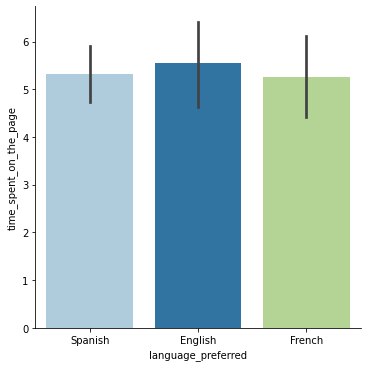

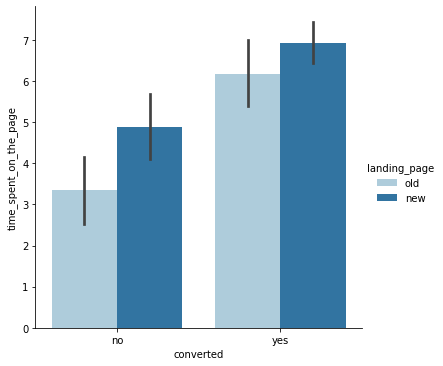

In [28]:
sns.catplot(data = df,  x= 'language_preferred', y = "time_spent_on_the_page", kind = "bar",  
            palette="Paired", );  # Plot of time spent by different language users
sns.catplot(data = df,  x= 'converted', y = "time_spent_on_the_page", hue = 'landing_page', kind = "bar",  
            palette="Paired", );  # Plot of conversion rates in old an new landing page

The mean time spent on the page for all three language_preferred is betweetn 5-6 minutes.

All three preferred language spend at least a minute more time on the new page than the old page.

____Questions and Statistical Analysis____

**Q2 Do the users spend more time on the new landing page than the old landing page?**

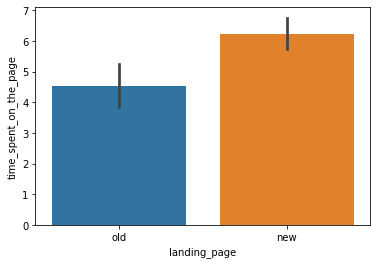

(landing_page
 new    6.22
 old    4.53
 Name: time_spent_on_the_page, dtype: float64,
 landing_page
 new    1.817031
 old    2.581975
 Name: time_spent_on_the_page, dtype: float64)

In [29]:
sns.barplot(data=df, x="landing_page", y="time_spent_on_the_page") # code for graph of landing_page agains time_spent_on_the_page
plt.show()
df1 = df.groupby("landing_page")["time_spent_on_the_page"]    # groupby landing_page(yes/no)
round(df1.mean(), 2), df1.std()   #calculating the mean and median time spent on new and old landing_page

***Null and alternative hypotheses***

$H_0:$:  time spent by users in the new landing_page is equal to time spend by users in the old landing_page.

$H_a:$   time spent by users in the new landing_page is greater than time spend by users in the old landing_page.

Significance leve = 0.05
|

In [30]:
# import the required functions
from scipy.stats import ttest_ind
# prepare the data
old_landing_page=df[df.landing_page=='old']['time_spent_on_the_page']     # time spent by people users on old landing_page
new_landing_page=df[df.landing_page=='new']['time_spent_on_the_page']     # time spent by people users on new landing_page
# find the p-value
test_stat, p_value = ttest_ind(new_landing_page, old_landing_page, equal_var = True, alternative = 'greater')  #checking the null hypothesis(Ho)
print('The p-value is ', p_value)
if p_value<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")


The p-value is  0.0001316123528095005
reject null hypothesis


__Conclusion__:
Since the pvalue is < 0.05, we reject the null hypothesis. Hence, we have enough statistical evidence to say that users spend more time on the new landing page than the old landing_page 

**Q3.Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the**

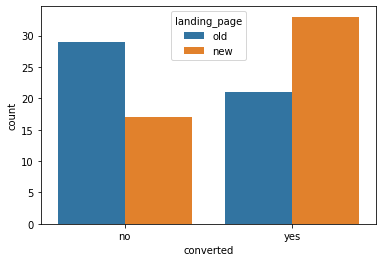

converted  landing_page
no         old             29
           new             17
yes        new             33
           old             21
Name: landing_page, dtype: int64

In [31]:
sns.countplot(data = df,  x = 'converted', hue = 'landing_page');
plt.show()
conversion_rate = df.groupby('converted')['landing_page']  # grouping by converted 
conversion_rate.value_counts()                             # finding ratio of converted in each page

***Null and alternative hypotheses***

$H_0:$:  Conversion rate by users in the new landing_page is equal to converstion rate by users in the old landing_page.

$H_a:$   Conversion rate by users in the new landing_page is greater than the converstion rate by users in the old landing_page.


Significance leve = 0.05


sns.countplot(data=df, hue="converted", x="landing_page")
plt.show()
df4 = df.groupby("landing_page")["converted"]
df4.value_counts() 

In [16]:
# find the p-value
from statsmodels.stats.proportion import proportions_ztest
stat, pval = proportions_ztest([33, 21], [50, 50], alternative = "larger")   #z proportions test for the null hypothesis (Ho)
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")


0.008026308204056278
reject null hypothesis


__Conclusion__
Since the p-value is < 0.05, we reject the null hypothesis. There is enough statistical evidence to say that the conversion rate for the new landing_page is greater than for the old landing page.

**Q4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]**

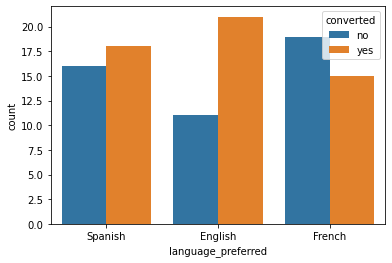

In [17]:
sns.countplot(data=df, x = 'language_preferred',  hue = 'converted');
#labeled_barplot(df, 'language_preferred', 'converted')  

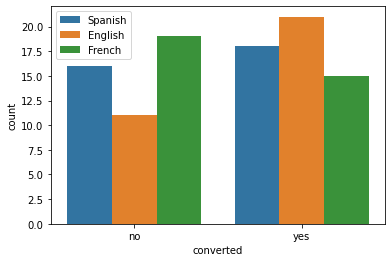

converted  language_preferred
no         French                19
           Spanish               16
           English               11
yes        English               21
           Spanish               18
           French                15
Name: language_preferred, dtype: int64

In [18]:
sns.countplot(data=df, x = 'converted',  hue = 'language_preferred')
plt.legend(loc='upper left');
plt.show()
df.groupby("converted")['language_preferred'].value_counts()

***Null and alternative hypotheses***

$H_0:$:  Converted status is the same for all three languages.

$H_a:$   Converted status is different for at least one language.


Significance leve = 0.05


In [19]:
#import the required functions
from scipy.stats import chi2_contingency
#preparing the contingency table
cont_table= pd.crosstab(df['language_preferred'],df['converted'])
chi, p_value, dof, expected = chi2_contingency(cont_table)
print('The p-value is ', p_value)
if p_value <0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")



The p-value is  0.2129888748754345
accept null hypothesis


__Conclusion__
p-value > 0. The null hypothesis cannot be rejected. There is not enough statistical evidence to sugest the converted rate depends on a preferred language. 

**Q5 Is the mean time spent on the new page same for the different language users?**

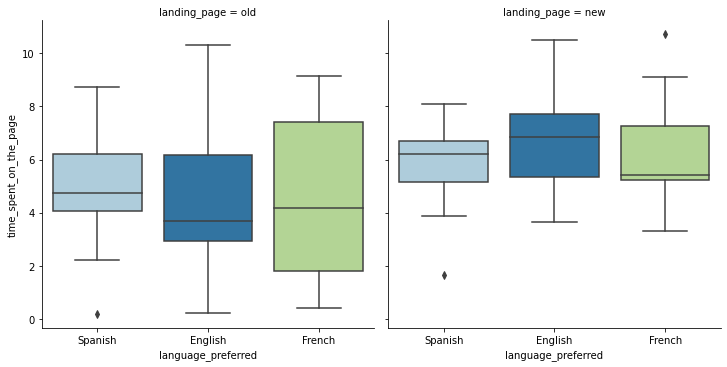

In [20]:
sns.catplot(data = df,  x= 'language_preferred', y = "time_spent_on_the_page", col = 'landing_page', kind = "box",  
            palette="Paired");


In [21]:
df2 = df[df['landing_page']=='new'].reset_index()      # Calling rows for only new landing_page and reseting the index
round(df2.groupby('language_preferred')['time_spent_on_the_page'].mean(), 2)  # grouping by preferred language and calculating the mean time spent 
                                                                            #each language on new landing_page


language_preferred
English    6.66
French     6.20
Spanish    5.84
Name: time_spent_on_the_page, dtype: float64

***Null and alternative hypotheses***

$H_0:$:  Mean time spent on the new landing_page is thhe same for all three languages.

$H_a:$   Mean time spent on the new landing_page is different for at least one language.

Significance level = 0.05

In [22]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df2.loc[df['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              df2.loc[df['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              df2.loc[df['language_preferred'] == 'English', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

if p_value <0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")



The p-value is 0.950753956878039
accept null hypothesis


In [ ]:
#data[data['landing_page' == 'new']]['landing_page'].mean()

mean time spent on new page is the same for different language users

__Conclusion__
p-value > 0.05.  The null hypothesis cannot be rejected. The mean time spent on the new page by different language users are not different


## Conclusion

- The users spend more time on the new page.

- The conversion rate for the new page is greater than the conversion rate of the old page. 

- The conversion status is independent of the preferred language.

- Based on the conclusions of the hypothesis tests, you can recommend that the news company should use the new landing page to gather more subscribers.

- The longer a visitor spends on a site, the more likely he/she is to convert. So, the business logic would appear to be: design a page that people spend time in, conversion will follow. 